## Problem Statement
    From YULU dataset we need to define which variables are significant in predicting the demand for shared electric cycles in the Indian market and also how well those variables describe the electric cycle demands

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, binom, ttest_ind, f_oneway, chi2_contingency, spearmanr, levene, kruskal
from statsmodels.stats.weightstats import ztest
from statsmodels.graphics.gofplots import qqplot_2samples

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

##### No null values present in data

In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [9]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

## UNIVARIATE ANALYSIS

In [10]:
df["datetime"].min()

Timestamp('2011-01-01 00:00:00')

In [11]:
df["datetime"].max()

Timestamp('2012-12-19 23:00:00')

In [12]:
df["datetime"].max() - df["datetime"].min()

Timedelta('718 days 23:00:00')

In [13]:
df.groupby(df["datetime"].dt.date).ngroups

456

In [14]:
from collections import defaultdict
dct_date = defaultdict(int)
dct_month = defaultdict(int)
dct_year = defaultdict(int)
for group in df.groupby(df["datetime"].dt.date):
    dct_date[str(group[0].day)] += 1
    dct_month[str(group[0].month)] += 1
    dct_year[str(group[0].year)] += 1

In [15]:
print(dct_date)
print(dct_month)
print(dct_year)

defaultdict(<class 'int'>, {'1': 24, '2': 24, '3': 24, '4': 24, '5': 24, '6': 24, '7': 24, '8': 24, '9': 24, '10': 24, '11': 24, '12': 24, '13': 24, '14': 24, '15': 24, '16': 24, '17': 24, '18': 24, '19': 24})
defaultdict(<class 'int'>, {'1': 38, '2': 38, '3': 38, '4': 38, '5': 38, '6': 38, '7': 38, '8': 38, '9': 38, '10': 38, '11': 38, '12': 38})
defaultdict(<class 'int'>, {'2011': 228, '2012': 228})


##### the data is from 2011-01-01 to 2012-12-19 for every one hour but only 456 days 
    => only from 1- 19 dates
    => all months
    => 228 from each of 2011 and 2012

In [16]:
df_temp = df["season"].value_counts()

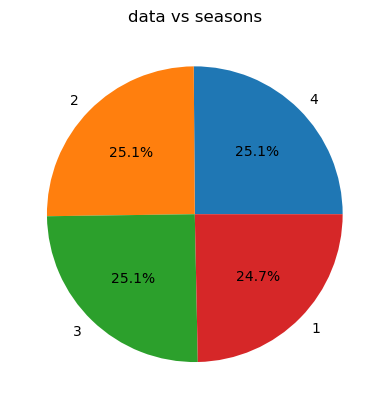

In [17]:
plt.pie(df_temp, labels=df_temp.index,autopct='%.1f%%',explode=(0,0,0,0))
plt.title("data vs seasons")
plt.show()

##### almost equal data from all four seasons

In [18]:
df_temp = df.groupby(df["datetime"].dt.date)["holiday"].agg("max").value_counts()

In [19]:
df.groupby(df["datetime"].dt.date).ngroups

456

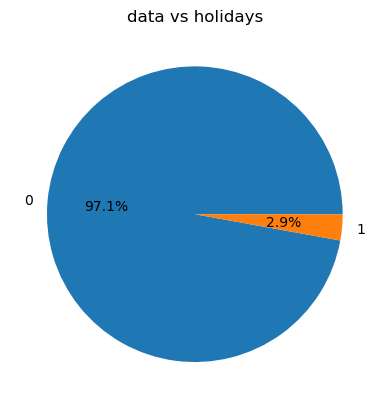

In [20]:
plt.pie(df_temp, labels=df_temp.index,autopct='%.1f%%',explode=(0,0))
plt.title("data vs holidays")
plt.show()

##### very less holiday's data

In [21]:
df_temp = df.groupby(df["datetime"].dt.date)["workingday"].agg("max").value_counts()

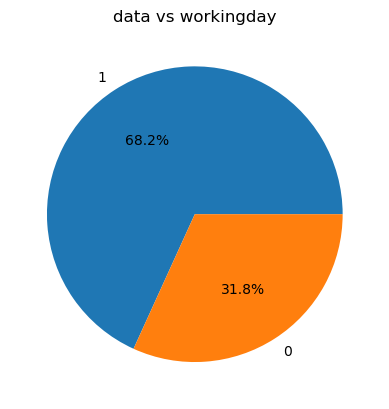

In [22]:
plt.pie(df_temp, labels=df_temp.index,autopct='%.1f%%',explode=(0,0))
plt.title("data vs workingday")
plt.show()

##### 31.8 % days are either weekend or holidays

In [23]:
df["weather"].value_counts(normalize = True)

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

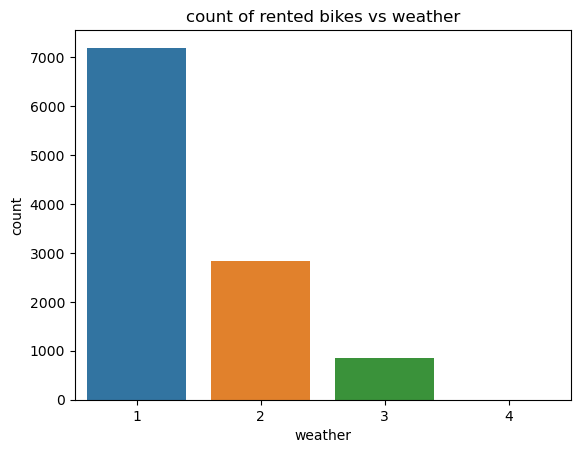

In [24]:
sns.countplot(data = df, x= "weather")
plt.title("count of rented bikes vs weather")
plt.show()

##### 66% data from weather 1

<AxesSubplot:xlabel='temp'>

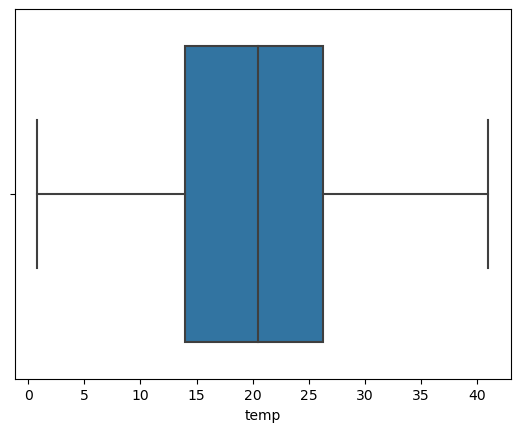

In [25]:
sns.boxplot(data = df, x= "temp")

<AxesSubplot:xlabel='atemp'>

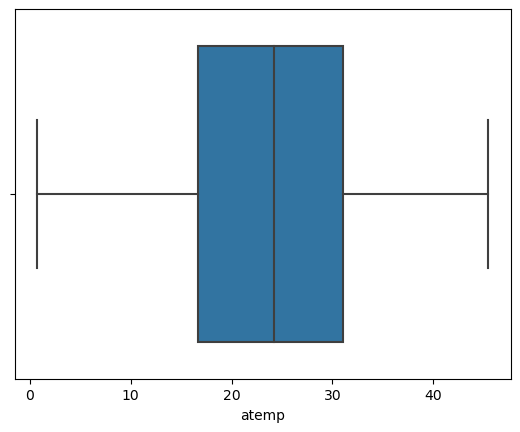

In [26]:
sns.boxplot(data = df, x= "atemp")

In [27]:
df['atemp_cat'] = pd.cut(x=df['atemp'], bins=[0, 5, 15, 25, 35, 46],
                    labels=["too cool", "cool", "normal", "hot", "too hot"])

#####  temprature median is 20.5 and feels like temp median is 24.24

<AxesSubplot:xlabel='humidity'>

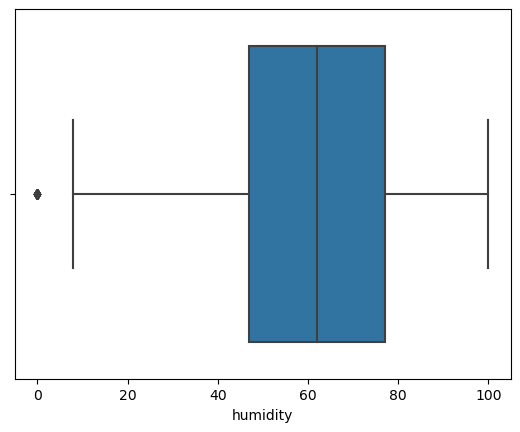

In [28]:
sns.boxplot(data = df, x= "humidity")

In [29]:
df['humidity_cat'] = pd.cut(x=df['humidity'], bins=[-1, 20, 40, 60, 80, 100],
                    labels=["0-20", "21-40", "41-60", "61-80", "81-100"])

<AxesSubplot:xlabel='windspeed'>

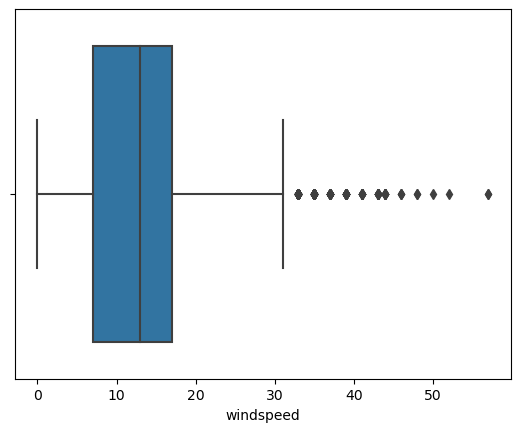

In [30]:
sns.boxplot(data = df, x= "windspeed")

In [31]:
df['windspeed_cat'] = pd.cut(x=df['windspeed'], bins=[-1, 10, 20, 30, 40, 60],
                    labels=["0-10", "11-20", "21-30", "31-40", "41-60"])

<AxesSubplot:xlabel='count'>

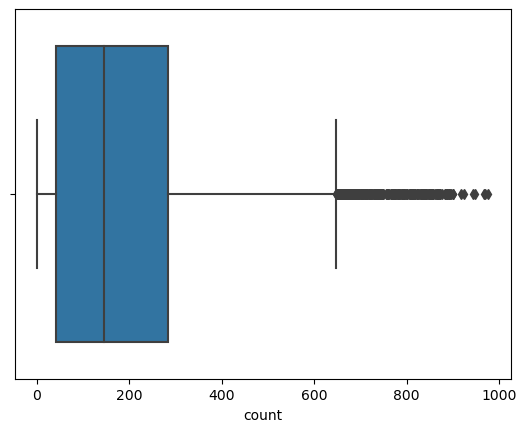

In [32]:
sns.boxplot(data = df, x= "count")

In [33]:
df["count"].mean()

191.57413191254824

In [34]:
df.groupby(df["datetime"].dt.date)["count"].sum().reset_index()["count"].mean()

4573.412280701755

##### mean is around 
    => 191 people will use every hour
    => 4573 people will use per day


## BIVARIATE ANALYSIS

<AxesSubplot:xlabel='season', ylabel='count'>

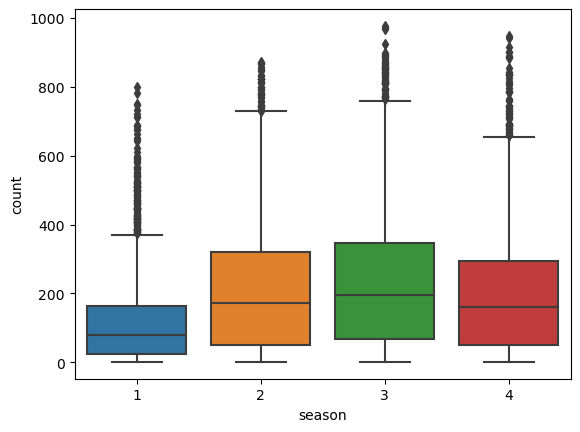

In [35]:
sns.boxplot(data = df, x= "season", y= "count")

##### median count is higher on season 2,3 and 4 compared to 1

<AxesSubplot:xlabel='holiday', ylabel='count'>

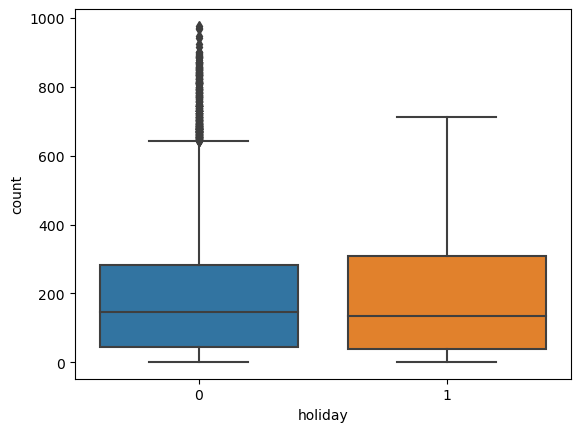

In [36]:
sns.boxplot(data = df, x= "holiday", y= "count")

<AxesSubplot:xlabel='workingday', ylabel='count'>

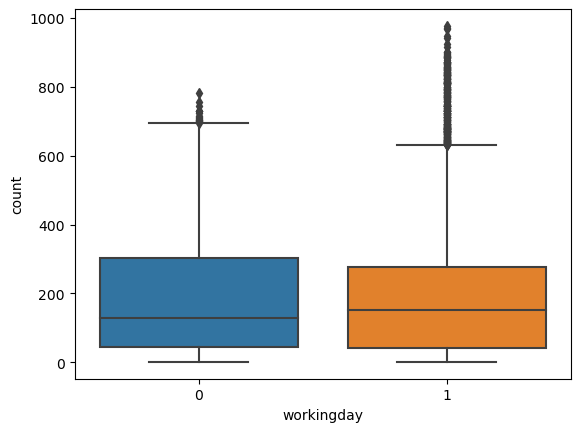

In [37]:
sns.boxplot(data = df, x= "workingday", y= "count")

##### almost similar pattern

<AxesSubplot:xlabel='weather', ylabel='count'>

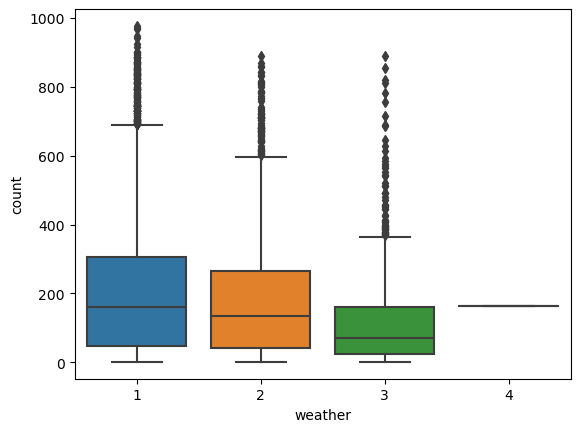

In [38]:
sns.boxplot(data = df, x= "weather", y= "count")

##### median of weather 1 is higher than other

<AxesSubplot:xlabel='atemp_cat', ylabel='count'>

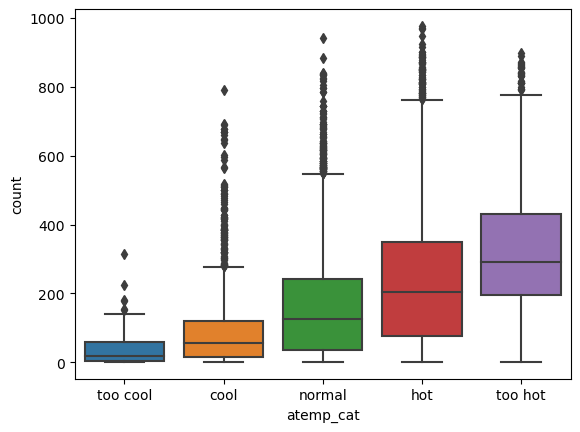

In [39]:
sns.boxplot(data = df, x= "atemp_cat", y= "count")

##### with the increase in temprature usage is more

<AxesSubplot:xlabel='humidity_cat', ylabel='count'>

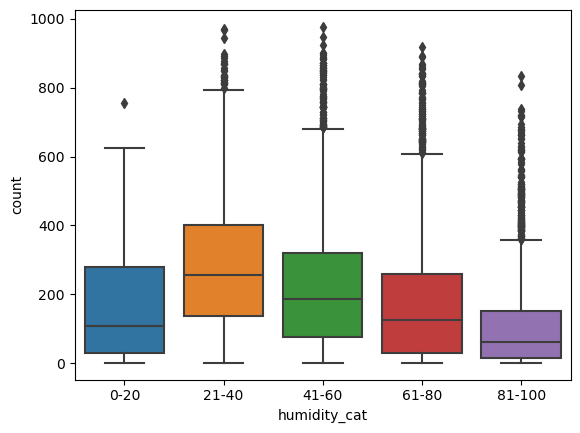

In [40]:
sns.boxplot(data = df, x= "humidity_cat", y= "count")

##### 21-40 humidity level times has more usage

<AxesSubplot:xlabel='windspeed_cat', ylabel='count'>

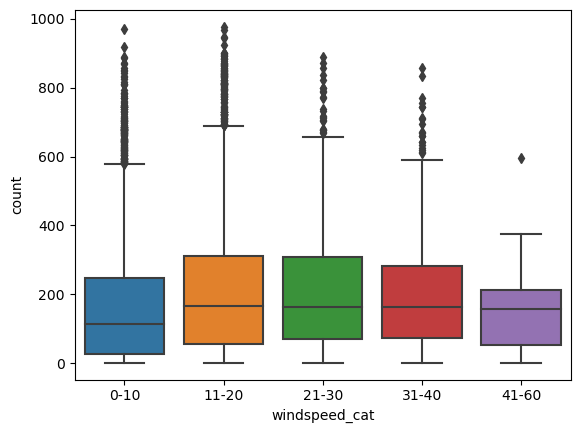

In [41]:
sns.boxplot(data = df, x= "windspeed_cat", y= "count")

##### windspeed seems to have no effect

In [42]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


### Working Day has effect on number of electric cycles rented

#### 
    => h0: working day has no effect on count
    => ha: working day has an effect on count

In [43]:
df_working = df[df["workingday"] == 1]["count"]
df_not_working = df[df["workingday"] != 1]["count"]

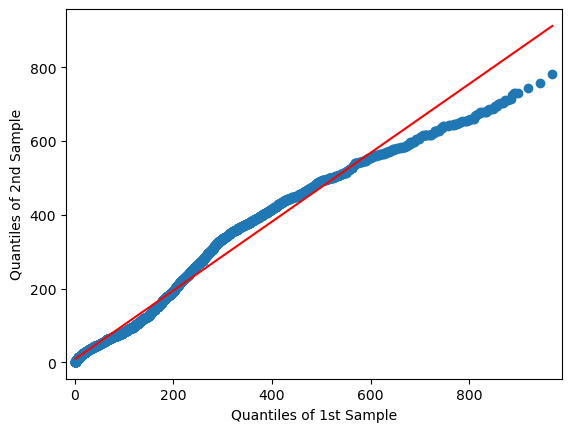

In [44]:
qqplot_2samples(df_working, df_not_working, line="r")
plt.show() 
#almost normal distribution

In [47]:
ttest_ind(df_working, df_not_working)
# for alpha 0.05, failed to reject ho

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

##### hence working day has no effect on number of electric cycles rented

### No. of cycles rented similar or different in different seasons

#### 
    => h0: No. of cycles rented similar in different seasons
    => ha: No. of cycles rented different in different seasons

In [48]:
df_g1 = df[df["season"] == 1]["count"]
df_g2 = df[df["season"] == 2]["count"]
df_g3 = df[df["season"] == 3]["count"]
df_g4 = df[df["season"] == 4]["count"]

In [49]:
# before using annova lets check if variance across groups is same or not
# ho = variance across groups is same
# ha = variance across groups is not same
levene(df_g1, df_g2, df_g3, df_g4)
# for alpha 0.05, as pvalue very less rejecting null hypothesis

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

In [50]:
#performing annova
f_oneway(df_g1, df_g2, df_g3, df_g4)
# for alpha 0.05, low p value reject ho

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

##### No. of cycles rented different in different seasons

### No. of cycles rented similar or different in different weather



    => ho: No. of cycles rented similar in different weather
    => ha: No. of cycles rented different in different weather

In [51]:
kruskal(df_g1, df_g2, df_g3, df_g4)
# for alpha 0.05, as pvalue very less rejecting null hypothesis

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

##### No. of cycles rented different in different weather

### Weather is dependent on season or not


    => ho: Weather is not dependent on season
    => ha: Weather is dependent on season

In [52]:
observed = pd.crosstab(df["weather"], df["season"])

In [53]:
chi2_contingency(observed)
#low p value, reject null hypothesis

(49.15865559689363,
 1.5499250736864862e-07,
 9,
 array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
        [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
        [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
        [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

##### weather is dependent on season

### cycles rented dependent feels like temprature or not


    => cycles rented is not dependent feels like temprature
    => cycles rented is dependent feels like temprature

In [54]:
np.corrcoef(df["atemp"], df["count"])[0][1]

0.3897844366269753

In [55]:
spearmanr(df["atemp"], df["count"])[0]

0.4065617539204584

##### some positive corelation

### Insights
        => more bikes are rented in season 2,3 and 4 compared to 1.
        => Whenever its a holiday more bikes are rented.
        => more bikes are rented on weather conditions 1 and 2
        => humidity is range 20-40 20, has more bikes rented compared to other
        => With increase in temperature count of bikes rented also increasing.
        
### Recommendations
        => In 2,3 and 4 seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
        => In humidity days other than 20-40 range, company should have less bikes in the stock to be rented.
        => Whenever temprature is less, company should put out less bikes.